## CA 0, FMNLP FALL 2023

- **Name:**
- **Student ID:**
##### *How to do this problem set:*

- Some questions require writing Python code and computing results, and the rest of them have written answers. For coding problems, you will have to fill out all code blocks that say `YOUR CODE HERE`.

- For text-based answers, you should replace the text that says "Write your answer here..." with your actual answer.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

##### *Academic honesty*

`We will audit the notebooks of ALL the students. The audits will check that the code you wrote actually generates the answers, and that you actually know how the code works.`

- We will also run automatic checks of notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

## Question 1 (10 points)

#### Question 1.1 (5 points)
Let's begin with a quick probability review. In the task of language modeling, we're interested in computing the **joint** probability of some text. Say we have a sentence $s$ with $n$ words ($w_1, w_2, w_3, \dots, w_n$) and we want to compute the joint probability $P(w_1, w_2, w_3, \dots, w_n$). Assume we are given a model that produces the conditional probability of the next word in a sentence given all preceding words: $P(w_i|w_1,w_2,\dots,w_{i-1})$. How can we use this model to compute the joint probability of sentence $s$?

---


**Write your answer here!** Please include an equation(s) formatted in LaTeX in your answer. You can add LaTeX to your answer by wrapping it in $ signs; see the above cell for examples.

#**My answer:**

We know that a sentence is made of words: $s = (w_1, w_2, w_3, \dots, w_n)$

So, we can write:

####$P(w_1, w_2, w_3, \dots, w_n)$ $=$ $P(w_1) \cdot P(w_2 | w_1) \cdot P(w_3|w_1, w_2) \cdot \dots \cdot P(w_n|w_1, w_2, \dots, w_{n-1})$

Or, we can simply write:

####$P(s)$ $=$ $P(w_1) {\displaystyle \prod_{i=2}^n P(w_i|w_1, w_2, \dots, w_{i-1})}$

Note: we have to write $P(w_1)$ at the beginning and outside product operator, since, we know every sentence has to start with a single word, and then, builds upon that first word with extra words to form a meaningful sentence.

Then, we can simply take $log$ from either side and that is as follows:

####$P(w_1, w_2, w_3, \dots, w_n)$ $=$ $log(P(w_1))$ $+$ ${\displaystyle \sum_{i=2}^n log(P(w_i|w_1, w_2, \dots, w_{i-1}))}$

#### Question 1.2 (2 points)
Why would we ever want to compute the joint probability of a sentence? Provide **two** different reasons why this probability might be useful to solve an NLP task.

---

**Write your answer here!** Please keep it brief (i.e., 2-3 sentences).

#**My answer:**
The first reason for this in the concept of "language generation" models, we follow a sequence of words to predict the next one, essentially completing the sentence. Computing the joint probability of the sentence and the word sequence is crucial in this context.

The second reason is inspired from "machine translation." Here, we aim to maximize the joint probability of the source sentence and potential target translations. This estimation helps the model select the most likely and coherent output. Consequently, computing the joint sentence probability is fundamental in these approaches.

#### Question 1.3 (3 points)
Here is a simple way to build a language model: for any prefix $w_1, w_2, \dots, w_{i-1}$, retrieve all occurrences of that prefix in some huge text corpus (such as the [Common Crawl](https://commoncrawl.org/)) and keep count of the word $w_i$ that follows each occurrence. I can then use this to estimate the conditional probability $P(w_i|w_1, w_2, \dots, w_{i-1})$ for any prefix. Explain why this method is completely impractical!

---

**Write your answer here!** Please keep it brief (i.e., 2-3 sentences).

#**My answer:**
The method mentioned in the link is impractical because it requires storing and processing extensive data and text for every possible prefix in a large corpus, making it computationally infeasible. Based on this approach, it seems inefficient in capturing and generating text. It struggles to generalize effectively from vast corpora due to explicit enumeration of all possible prefixes and their associated word probabilities. Furthermore, it fails to generalize well for rare or unseen prefixes.

## Question 2 (5 points)

#### Question 2.1 (3 points)
Let's switch over to coding! The below coding cell contains the opening paragraph of Daphne du Maurier's novel *Rebecca*. Write some code in this cell to compute the number of unique word **types** and total word **tokens** in this paragraph (watch the lecture videos if you're confused about what these terms mean!). Use a whitespace tokenizer to separate words (i.e., split the string on white space using Python's split function). Be sure that the cell's output is visible in the PDF file you turn in on Gradescope.

---


In [ ]:
paragraph = '''Last night I dreamed I went to Manderley again. It seemed to me
that I was passing through the iron gates that led to the driveway.
The drive was just a narrow track now, its stony surface covered
with grass and weeds. Sometimes, when I thought I had lost it, it
would appear again, beneath a fallen tree or beyond a muddy pool
formed by the winter rains. The trees had thrown out new
low branches which stretched across my way. I came to the house
suddenly, and stood there with my heart beating fast and tears
filling my eyes.'''.lower() # lowercase normalization is often useful in NLP

# YOUR CODE HERE! POPULATE THE types AND tokens VARIABLES WITH THE CORRECT VALUES!

# splitting the paragraph into words using whitespace as the delimiter, just like the question asked
# in this way, the punctuations are attached to the previous word, like: "eyes.".
# to solve this issue, we could use NLTK package and its "word_tokenize" method.
# link for examples: https://www.nltk.org/api/nltk.tokenize.html

#from nltk.tokenize import wordpunct_tokenize
#words = wordpunct_tokenize(paragraph)

words = paragraph.split()

# number of unique word types:
types = len(set(words))

# total word tokens:
tokens = len(words)

# DO NOT MODIFY THE BELOW LINE!
print('Number of word types: %d, number of word tokens:%d' % (types, tokens))

Number of word types: 76, number of word tokens:100


#### Counter
Now let's look at the most frequently used word **types** in this paragraph. Write some code in the below cell to print out the ten most frequently-occurring types. We have initialized a [Counter](https://docs.python.org/2/library/collections.html#collections.Counter) object that you should use for this purpose. In general, Counters are very useful for text processing in Python.

---


In [ ]:
from collections import Counter


c = Counter(words) # added words inside Counter()

for word, count in c.most_common()[:10]:
    print(word, count)

i 6
the 6
to 4
a 3
and 3
my 3
it 2
that 2
was 2
with 2


#### Question 2.2 (2 points)
What do you notice about these words and their linguistic functions (i.e., parts-of-speech)? These words are known as "stopwords" in NLP and are often removed from the text before any computational modeling is done. Why do you think that is?

---


**Write your answer here!** Please keep it brief (i.e., 2-3 sentences).

###**My answer:**
The primary reason for removing stopwords in the pre-processing step of any NLP task, such as sentiment analysis or topic modeling, is that these words are the most common and frequently used words in texts. They primarily serve to connect sentence parts and contribute to grammatical structure, lacking substantial semantic meaning on their own. Removing stopwords also helps reduce input feature vector dimensionality, improving model efficiency and minimizing noise in computations. This allows us to focus on the parts of sentences that carry meaningful semantic information.

## Question 3 (10 points)


In *neural* language models, we represent words with low-dimensional vectors also called *embeddings*. We use these embeddings to compute a vector representation $\boldsymbol{x}$ of a given prefix, and then predict the probability of the next word conditioned on $\boldsymbol{x}$. In the below cell, we use [PyTorch](https://pytorch.org), a machine learning framework, to explore this setup. If you're finding the PyTorch coding problems difficult, you may want to run through [Pytorch tutorials](https://pytorch.org/tutorials)! `You can not use keras, tensorflow, lightning, HF transformers, HF datasets, fastai.`

In [ ]:
import torch
torch.set_printoptions(sci_mode=False)
torch.manual_seed(0)

prefix = 'Alice talked to'

# spend some time understanding this code / reading relevant documentation!
# this is a toy problem with a 5 word vocabulary and 10-d embeddings
embeddings = torch.nn.Embedding(num_embeddings=5, embedding_dim=10)
## vocab dictionary:
vocab = {'Alice':0, 'talked':1, 'to':2, 'Bob':3, '.':4}

# we need to encode our prefix as integer indices (not words) that index
# into the embeddings matrix. the below line accomplishes this.
# note that PyTorch inputs are always Tensor objects, so we need
# to create a LongTensor out of our list of indices first.
indices = torch.LongTensor([vocab[w] for w in prefix.split()])
prefix_embs = embeddings(indices)
print('prefix embedding tensor size: ', prefix_embs.size())

# okay! we now have three embeddings corresponding to each of the three
# words in the prefix. We add them element-wise to obtain
# a representation of the prefix! We store our answer in a variable named "x".

x = prefix_embs.sum(dim=0)
print('embedding sum: ', x)


prefix embedding tensor size:  torch.Size([3, 10])
embedding sum:  tensor([-0.1770, -2.3993, -0.4721,  2.6568,  2.7157, -0.1408, -1.8421, -3.6277,
         2.2783,  1.1165], grad_fn=<SumBackward1>)


#### Question 3.1 (2 points)
Modern language models do not use element-wise addition to combine the different word embeddings in the prefix into a single representation (a process called *composition*). What is a major issue with element-wise functions that makes them unsuitable for use as composition functions?

---

**Write your answer here!** Please keep it brief (i.e., 2-3 sentences).

###**My answer:**
The said approach fails to capture complex word relationships like modern language models, resulting in information loss. It lacks depth and fails to cover the full range of a sentence's meaning, syntax, and intent. Language exhibits a hierarchical structure, making simple element-wise operations insufficient to grasp semantic and syntactic dependencies. This limitation hampers nuanced text comprehension. Modern models use deep neural networks like Transformers and RNNs to overcome this.

#### Question 3.2 (3 points)
One very important function in neural language models (and for basically every task we'll look at this semester) is the [softmax](https://pytorch.org/docs/master/nn.functional.html#softmax), which is defined over an $n$-dimensional vector $<x_1, x_2, \dots, x_n>$ as $\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{1 \leq j \leq n} e^{x_j}}$. Let's say we have our prefix representation $\boldsymbol{x}$ from before. We can use the softmax function, along with a linear projection using a matrix $W$, to go from $\boldsymbol{x}$ to a probability distribution $p$ over the next word: $p = \text{softmax}(W^T\boldsymbol{x})$. Let's explore this in the code cell below:


In [ ]:
# remember, our goal is to produce a probability distribution over the
# next word, conditioned on the prefix representation x. This distribution
# is thus over the entire vocabulary (i.e., it is a 5-dimensional vector).
# take a look at the dimensionality of x, and you'll notice that it is a
# 10-dimensional vector. first, we need to **project** this representation
# down to 5-d. We'll do this using the below matrix:

import torch.nn.functional as F


W = torch.rand(10, 5)

# use this matrix to project x to a 5-d space, and then
# use the softmax function to convert it to a probability distribution.
# this will involve using PyTorch to compute a matrix/vector product.
# look through the documentation if you're confused (torch.nn.functional.softmax)
# please store your final probability distribution in the "probs" variable.

### YOUR CODE HERE

# projecting "x" to a 5D space using W:
x_projected = torch.matmul(W.T, x) # (x, W)
print(x_projected.shape)

# applying softmax to obtain the probability distribution:
probs = F.softmax(x_projected, dim=-1)

### DO NOT MODIFY THE BELOW LINE!
print('probability distribution', probs)

torch.Size([5])
probability distribution tensor([0.0718, 0.0998, 0.1331, 0.6762, 0.0191], grad_fn=<SoftmaxBackward0>)


#### Question 3.3 (5 points)
So far, we have looked at just a single prefix ("Alice talked to"). In practice, it is common for us to compute many prefixes in one computation, as this enables us to take advantage of GPU parallelism and also obtain better gradient approximations (we'll talk more about the latter point later). This is called *batching*, where each prefix is an example in a larger batch. Here, you'll redo the computations from the previous cells, but instead of having one prefix, you'll have a batch of two prefixes. The final output of this cell should be a 2x5 matrix that contains two probability distributions, one for each prefix. **NOTE: YOU WILL LOSE POINTS IF YOU USE ANY LOOPS IN YOUR ANSWER!** Your code should be completely vectorized (a few large computations is faster than many smaller ones).

In [ ]:

# for this problem, we'll just copy our old prefix over three times
# to form a batch. in practice, each example in the batch would be different.
batch_indices = torch.cat(2 * [indices]).reshape((2, 3))
batch_embs = embeddings(batch_indices)
print('batch embedding tensor size: ', batch_embs.size())

# now, follow the same procedure as before:
# step 1: compose each example's embeddings into a single representation
# using element-wise addition. HINT: check out the "dim" argument of the torch.sum function!
batch_embs = torch.sum(batch_embs, dim=1)
print(batch_embs.shape)

# step 2: project each composed representation into a 5-d space using matrix W
batch_embs = torch.matmul(batch_embs, W)

# step 3: use the softmax function to obtain a 2x5 matrix with the probability distributions
# please store this probability matrix in the "batch_probs" variable.
batch_probs = F.softmax(batch_embs, dim=1)

### DO NOT MODIFY THE BELOW LINE
print("batch probability distributions:", batch_probs)

batch embedding tensor size:  torch.Size([2, 3, 10])
torch.Size([2, 10])
batch probability distributions: tensor([[0.0718, 0.0998, 0.1331, 0.6762, 0.0191],
        [0.0718, 0.0998, 0.1331, 0.6762, 0.0191]], grad_fn=<SoftmaxBackward0>)


## Question 4) `Hafez` (40 points)

#### 4.1) Read the 'Hafez.txt' file and perform the necessary data cleaning. You should use word-level tokenization (splitting words by space is fine). You should create a dictionary that maps tokens to indices and vice versa (10 points). `Remember, you should not have duplicate tokens in your dictionary.`

In [ ]:
# our imports for whole Question 4 and also Question 5:

%%capture

!pip install python-bidi
!pip install arabic-reshaper

import torch
import random
import nltk
import time
import math
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader
from collections import Counter
from bidi.algorithm import get_display
from arabic_reshaper import reshape


warnings.filterwarnings("ignore")

In [ ]:
hemistichs = []

with open("hafez.txt", "r", encoding="utf-8") as file:
    for line in file.readlines():
        # remove any leading, and trailing whitespaces:
        line = line.strip()

        # remove lines which are just empty spaces and contain no words:
        if line == "":
            continue

        if line == "\ufeff":
            continue

        # replace zero-width space with full space:
        line = line.replace("\u200c", " ")

        # remove the lines which have the title: "ghazal %d":
        if any(char.isdigit() for char in line):
            continue

        # add item to the list:
        hemistichs.append(line)

print(f"{len(hemistichs) = }")

tokens = " ".join(hemistichs).split()
print(f"{len(tokens) = }")

# remove duplicate tokens by converting to a set and back to a list:
unique_tokens = list(set(tokens))
print(f"{len(unique_tokens) = }")

token_to_index = {token: index for index, token in enumerate(unique_tokens)}
index_to_token = {index: token for token, index in token_to_index.items()}

len(hemistichs) = 8384
len(tokens) = 64324
len(unique_tokens) = 7826


#### 4.2) Before and after each hemistich (مصرع), add [S] and [E] as start and end tokens. Create bigrams from all the text and randomly print 5 of them. (10 points)
three bigram examples: ( ناولها,[E] ), ( کاسا,ادر ) , ( آسان ,عشق)

In [ ]:
hemistichs = ["[S] " + hemistich + " [E]" for hemistich in hemistichs]

tokens = " ".join(hemistichs).split()
print(f"{len(tokens) = }")

# remove duplicate tokens by converting to a set and back to a list:
unique_tokens = list(set(tokens))
print(f"{len(unique_tokens) = }")

token_to_index["[S]"] = list(token_to_index.values())[-1] + 1
token_to_index["[E]"] = list(token_to_index.values())[-1] + 1

index_to_token = {index: token for token, index in token_to_index.items()}

# for testing:
# (i don't know why, but it hangs in google colab. however, it works fine on my laptop)
#for hemistich in hemistichs_tagged:
#    print("Starting characters:", '"' + hemistich[:3] + '"', "and Ending characters:", '"' + hemistich[-3:] + '"')

# the below code is inspired from https://stackoverflow.com/a/21844800:
bigrams = [
        bigram
        for line in hemistichs
        for bigram in zip(line.split(" ")[:-1], line.split(" ")[1:])
]

bigrams_numerical = [(token_to_index[bigram[0]], token_to_index[bigram[1]]) for bigram in bigrams]
print(f"{len(bigrams) = }")

print("randomly selected bigrams:")
print(random.sample(bigrams, 5))

del bigrams

len(tokens) = 81092
len(unique_tokens) = 7828
len(bigrams) = 72708
randomly selected bigrams:
[('[S]', 'مرنج'), ('[S]', 'مزد'), ('نخرد', 'طوفان'), ('دل', 'ماست'), ('باشی', '[E]')]


#### 4.3) Choose the 25 most common tokens in the text. Create a bigram heatmap with one token on the y-axis and another token of the bigram on the x-axis. You should create a 25x25 matrix and display the tokens in the squares. Remember that this matrix won't be symmetrical because the order of tokens matters in bigrams. `You are allowed to use any visualization library.` (10 points)

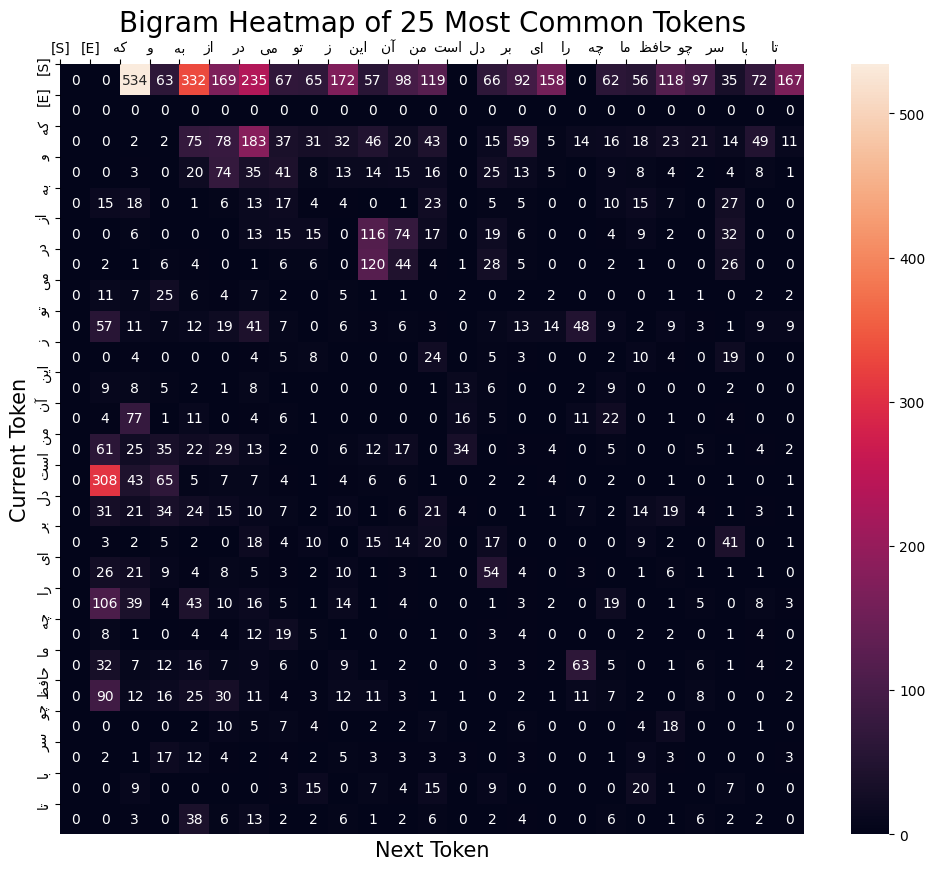

In [ ]:
# count the frequency of each token:
token_frequency_tagged = nltk.FreqDist(tokens)

# 25 most common tokens:
common_tokens = [token for token, _ in token_frequency_tagged.most_common(25)]

heatmap_matrix = np.zeros((25, 25), dtype=int)

# count the frequency of each bigram within the common tokens:
for bigram in bigrams_numerical:
    token1, token2 = bigram
    token1, token2 = index_to_token[token1], index_to_token[token2]
    if token1 in common_tokens and token2 in common_tokens:
        i = common_tokens.index(token1)
        j = common_tokens.index(token2)
        heatmap_matrix[i][j] += 1

# inspired by https://medium.com/@amirashabani/pie-chart-and-persian-language-in-python-68dfd03a26fb:
common_tokens = [get_display(reshape(token)) for token in common_tokens]

plt.figure(figsize=(12, 10))

ax = sns.heatmap(heatmap_matrix, annot=True, xticklabels=common_tokens, yticklabels=common_tokens, fmt='d')

# move x-axis labels to the top:
ax.xaxis.set_ticks_position("top")

plt.xticks(np.arange(25), common_tokens, fontsize=10)
plt.yticks(np.arange(25), common_tokens, fontsize=10)

plt.xlabel("Next Token", fontsize=15)
plt.ylabel("Current Token", fontsize=15)

plt.title("Bigram Heatmap of 25 Most Common Tokens", fontsize=20)

plt.show()

#### 4.4) Generate poems using bigram distributions. Start from the [S] token, then generate tokens until you reach the [E] token or reach a total of 30 tokens. Use the following functions for sampling. Print the ten poems you generate using these ten seeds. (5 points).

```python
seeds = list(np.array(your_student_number) + np.array([0,1,2,3,4,5,6,7,8,9])) ## beware broadcasting
for seed in seeds:
    generator = torch.Generator.manual_seed(seed)
    torch.multinomial(generator=generator) ## don't use a token more than once (use the replacement argument)
```

In [ ]:
def generate_next_token(last_token, bigrams_tmp, generator, random_generation=False):
    candidates = [index_to_token[bigram[1]] for bigram in bigrams_tmp if index_to_token[bigram[0]] == last_token]

    if candidates:
        if random_generation:
            # we pass torch.ones as to assign equal probabilities to all of the candidate bigrams.
            # this way, we truly do a random sampling:
            next_token = torch.multinomial(torch.tensor([1.0] * len(candidates)), 1, generator=generator, replacement=False)
        else:
            # distribution of candidates should be passed to multinomial instead of torch.ones:
            # "candidates" and "candidates_values" share the same indices
            candidates_values = [bigrams_counts[(token_to_index[last_token], token_to_index[candidate])] for candidate in candidates]
            next_token = torch.multinomial(torch.tensor(candidates_values, dtype=torch.float64), 1, generator=generator, replacement=False)

        return candidates[next_token]
    else:
        # if there are no candidates, return the [E] token to end the poem:
        return end_token

start_token = "[S]"
end_token = "[E]"
max_len = 30

bigrams_counts = nltk.FreqDist(bigrams_numerical) # Counter(bigrams)

seeds = list(np.array(810101012) + np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

poems = []

for seed in seeds:
    # to set the random seed, we have two approaches:
    # both work the same. we utilize the first approach.

    # approach 1 (there is changes to original code):
    generator = torch.Generator().manual_seed(int(seed))

    # approach 2, presented code didn't work, so, i got help from this link:
    # https://stackoverflow.com/a/71625137
    #generator = torch.manual_seed(seed)

    # we initialize the poem with the [S], the starting token:
    poem = [start_token]

    # we will generate tokens until reaching the [E], the ending token or a total of 30 tokens:
    while len(poem) < 30 and poem[-1] != end_token:
        last_token = poem[-1]

        # we generate the next token based on the bigram distribution:
        # we set "random_generation" argument to false, since, we want to sample from bigram distribution.
        next_token = generate_next_token(last_token, bigrams_numerical, generator, random_generation=False)

        poem.append(next_token)

    print("The generated poem:", " ".join(poem))

    poems.append(poem)

The generated poem: [S] گر چه حاجت است [E]
The generated poem: [S] که در اين درد سر و از اين بار غم ز خاک در اين خرقه که بر تو در جهان دشمن به فرياد که اين دير است [E]
The generated poem: [S] از آن که من [E]
The generated poem: [S] به بوی زلف تو خوش [E]
The generated poem: [S] در اين دريا فکنش [E]
The generated poem: [S] اين کار [E]
The generated poem: [S] که اين ره دين می کند [E]
The generated poem: [S] که ز دست [E]
The generated poem: [S] تا به خون خوری و از اين که يار شود از آن که به کام [E]
The generated poem: [S] ز من [E]


#### 4.5) Based on the distribution of bigrams, each bigram has a probability. Calculate the average negative log likelihood of all bigrams. What does this number show? Compare this to a model that generates bigrams completely randomly (a model that doesn't have access to bigram statistics but wants to generate bigrams). (5 points)

In [ ]:
random_poems = []

for seed in seeds:
    # to set the random seed, we have two approaches:

    # approach 1 (there is changes to original code):
    generator = torch.Generator().manual_seed(int(seed))

    # approach 2, presented code didn't work, so, i got help from this link:
    # https://stackoverflow.com/a/71625137
    #generator = torch.manual_seed(seed)

    # we initialize the poem with the [S], the starting token:
    random_poem = [start_token]

    # we will generate tokens until reaching the [E], the ending token or a total of 30 tokens:
    while len(random_poem) < 30 and random_poem[-1] != end_token:
        last_token = random_poem[-1]

        # we generate the next token based on the bigram distribution:
        next_token = generate_next_token(last_token, bigrams_numerical, generator, random_generation=True)

        random_poem.append(next_token)

    print("The generated random poem:", " ".join(random_poem))

    random_poems.append(random_poem)

The generated random poem: [S] دوستی کی [E]
The generated random poem: [S] که در به جايست [E]
The generated random poem: [S] در زنگ ظلام اندازد [E]
The generated random poem: [S] پيش که داشت [E]
The generated random poem: [S] ملک اسکندر آمدی [E]
The generated random poem: [S] همه عالم به لب چشمه خرابات [E]
The generated random poem: [S] حافظا [E]
The generated random poem: [S] باده بياور باده که صافی شو در او [E]
The generated random poem: [S] بر رخ لاله پر ز زلف و بمير [E]
The generated random poem: [S] در چشم گهربار همان به هوای وصال است [E]


In [ ]:
bigrams_numerical_matrix = torch.zeros((len(unique_tokens), len(unique_tokens)), dtype=torch.float)
print(f"{bigrams_numerical_matrix.shape = }")

for bigram in bigrams_numerical:
    bigrams_numerical_matrix[bigram[0]][bigram[1]] += 1

# calculate the average negative log likelihood for the case in which we utilize bigrams:
# inspired by: https://medium.com/deeplearningmadeeasy/negative-log-likelihood-6bd79b55d8b6
# and https://www.youtube.com/watch?v=ziq967YrSsc

# we are only interested in calculating for non-zero elements:
non_zeros_indices = bigrams_numerical_matrix.nonzero()

# sum for each row, then, we divide each element by that sum:
# inspired by https://stackoverflow.com/questions/70720494/how-can-i-make-all-rows-of-matrix-sum-1-from-tensor-in-pytorch
# and https://stackoverflow.com/questions/47406429/how-pytorch-do-row-normalization-for-each-matrix-in-a-3d-tensorvariable
# and https://stackoverflow.com/questions/55205750/unable-to-normalize-tensor-in-pytorch
# and https://stackoverflow.com/questions/65508577/pytorch-normalize-2d-tensor

bigrams = bigrams_numerical_matrix / bigrams_numerical_matrix.sum(dim=-1).view(-1, 1)

non_zeros_values = bigrams[non_zeros_indices[:, 0], non_zeros_indices[:, 1]]

# if take log from zero values, it becomes undefined, thus, we compute NLL loss...
# ...only for non-zero elements:
bigram_avg_negative_log_likelihood = torch.mean(-torch.log(non_zeros_values))

# for the case in which we don't utilize bigrams and everything is random:
random_avg_negative_log_likelihood = torch.mean(-torch.log(torch.Tensor([1 / len(set(bigrams_numerical))]))).item()

print(f"Average Negative Log Likelihood for Bigram Statistics Case: {bigram_avg_negative_log_likelihood}")
print(f"Average Negative Log Likelihood for Random Case: {random_avg_negative_log_likelihood}")

bigrams_numerical_matrix.shape = torch.Size([7828, 7828])
Average Negative Log Likelihood for Bigram Statistics Case: 3.5285322666168213
Average Negative Log Likelihood for Random Case: 10.65624713897705


## Question 5 (15 points + 15 extra points)

We Want to Implement a small part of the paper [Bengio et al, 2003](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf). We use Hafez dataset. use `torch.nn.embedding` to convert each token index to 60 dimensional embeddings.
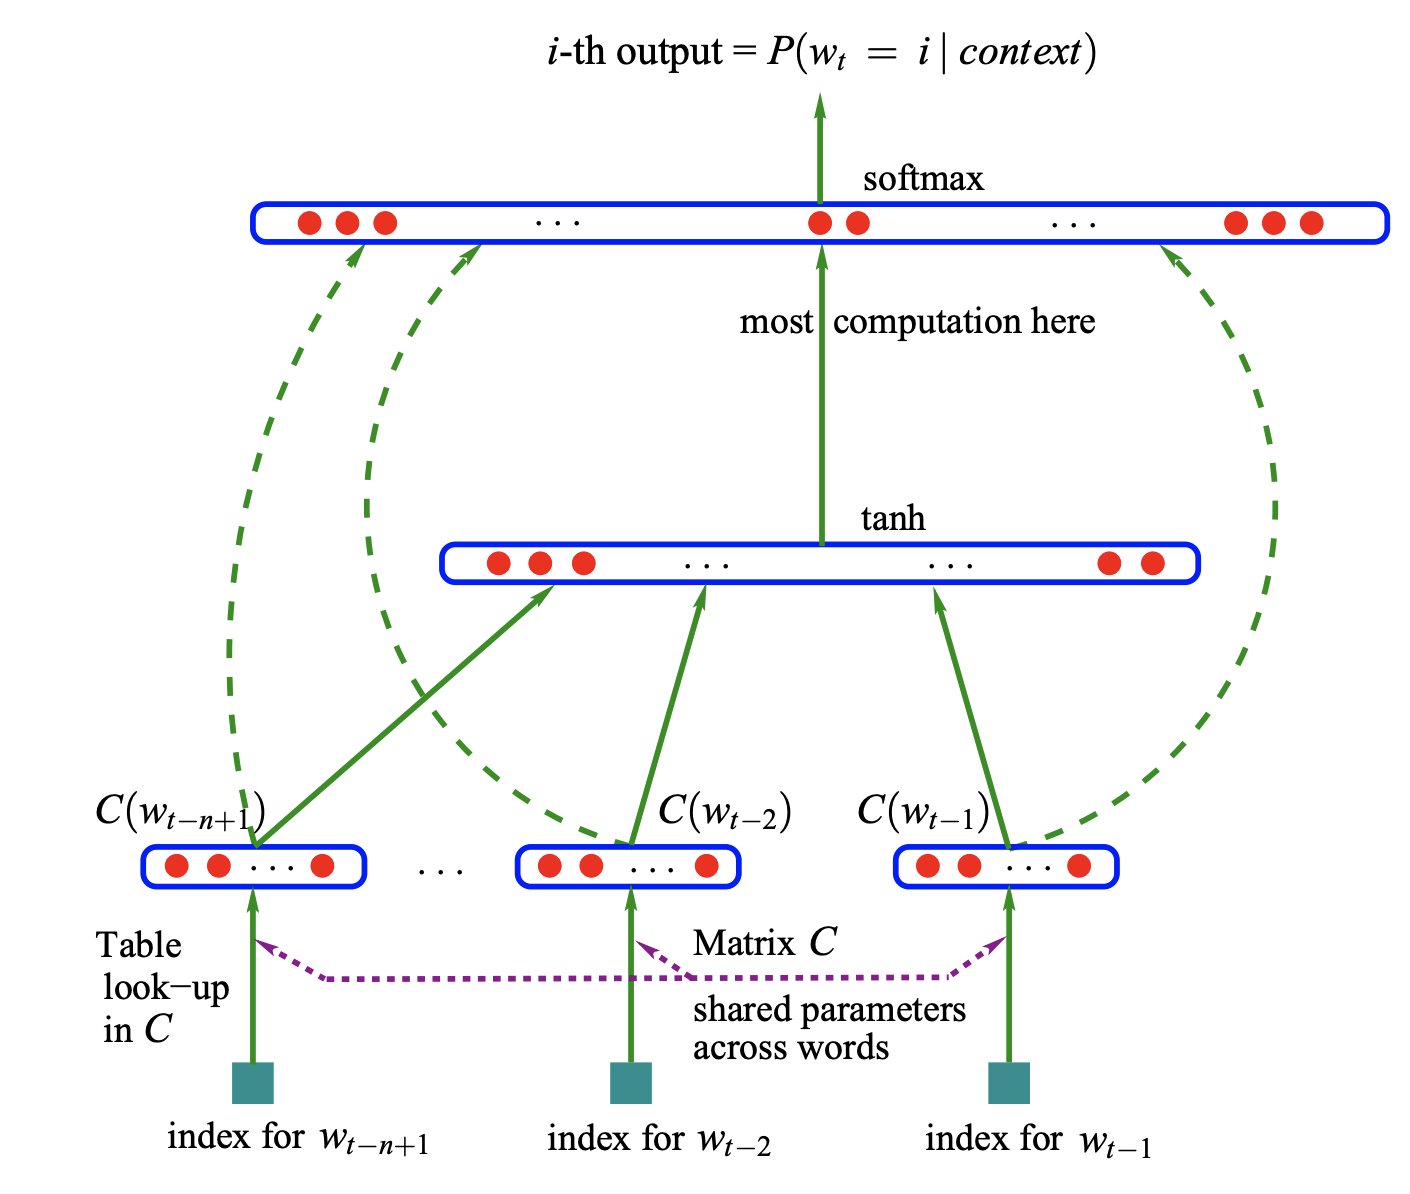

#### 5.1) implement the simple MLP in the paper using pytorch. there is only one hidden layer with tanh nonlinearity. plot the losses for train and test data. use 80/20 split. (no need to implement the dashed green line paths) (15 points)

In [ ]:
# CELL #1

# our hyper-parameters:

EMBEDDING_DIM = 100
INPUT_SIZE = 2 # number of words in our input or "X" variable (n - 1 = 3 - 1 = 2)
BATCH_SIZE = 2048
H = 50
EPOCHS = 20

# 80% for training and 20% for validation:
train_indices_limit = int(len(hemistichs) - (len(hemistichs) * 0.2))

# check if gpu is available:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# CELL #2

# the logic to generate the dataset is inspired by: https://github.com/jinmang2/NPLM/blob/master/nplm.ipynb and also
# https://github.com/jinmang2/NPLM/blob/master/nplm.py which are from same repository

# create required lists for our dataset:

x_train = []
y_train = []
x_val = []
y_val = []

# create training and validation set:

for i, hemistich in enumerate(hemistichs):
    hemistich = hemistich.split()

    for j, token in enumerate(hemistich):
        if j + 2 >= len(hemistich):
            # sentence boundary reached. ignoring hemistich less than 3 words
            break

        # convert token to index:
        # "x" consists of current token and the next token.
        # "y" is only the third token in our trigram
        x = [token_to_index[token], token_to_index[hemistich[j + 1]]]
        y = [token_to_index[hemistich[j + 2]]]

        if i < train_indices_limit:
            x_train.append(x)
            y_train.append(y)
        else:
            x_val.append(x)
            y_val.append(y)

# making numpy arrays for our dataset:

x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
x_val = torch.Tensor(x_val)
y_val = torch.Tensor(y_val)

print(f"{x_train.shape = }")
print(f"{y_train.shape = }")
print(f"{x_val.shape = }")
print(f"{y_val.shape = }")

# create training and validation dataloaders:

train_set = np.concatenate((x_train, y_train), axis=1)
val_set = np.concatenate((x_val, y_val), axis=1)

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE)

x_train.shape = torch.Size([51799, 2])
y_train.shape = torch.Size([51799, 1])
x_val.shape = torch.Size([12525, 2])
y_val.shape = torch.Size([12525, 1])


In [ ]:
# CELL #3

# Neural Probabilistic Language Model:
# design and implementation of the model is inspired by: https://github.com/jinmang2/NPLM/blob/master/nplm.ipynb


class NPLM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, input_size, h):
        super(NPLM, self).__init__()

        self.input_size = input_size
        self.embedding_dim = embedding_dim

        # to convert token indices to numbers and make my life a bit easier:
        # inspired by https://stackoverflow.com/a/51060374
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)

        # we multiply input_size to embedding_dim, since, we have two words in our input:
        self.fc1 = nn.Linear(input_size * embedding_dim, h)

        self.tanh = nn.Tanh()

        self.fc2 = nn.Linear(h, vocab_size)

    def forward(self, x):
        # we concatenate of both tokens' embeddings (x_1 and x_2)
        x = self.embeddings(x)

        # we convert from (batch_size, num_words, embedding_dim) to...
        # ...(batch_size, num_words * embedding_dim)
        # meaning: from (256, 2, 200) to (256, 400).
        # this makes the following linear layers process easier:
        x = x.view((-1, self.input_size * self.embedding_dim))

        x = self.fc1(x)
        x = self.tanh(x)

        x = self.fc2(x)

        # inspired by my friend's suggestion and also the link: https://pytorch.org/docs/stable/generated/torch.nn.functional.log_softmax.html
        # Applies a softmax followed by a logarithm. While mathematically equivalent to log(softmax(x))
        x = F.log_softmax(x, dim=1)

        return x

In [ ]:
# CELL #4

# negative log-likelihood loss:
criterion = nn.NLLLoss()

# create our model:
model = NPLM(len(unique_tokens), EMBEDDING_DIM, INPUT_SIZE, H).to(device)

optimizer = optim.Adam(model.parameters(), lr=2e-3)

In [ ]:
# CELL #5

# training time:
# inspired by my own codes in: https://github.com/rsd16/my-pytorch-tutorial/blob/6e406bc936552db58b35f022aa59fb223b7dd1f0/ptmein34.py#L134C1-L206C236

train_loss_progress = []
val_loss_progress = []

for epoch in range(EPOCHS):
    print(f"\nEpoch: {epoch + 1}")

    train_loss = 0

    model.train()

    for i, data_tensor in enumerate(train_loader):
        x = data_tensor[:, 0:2]
        y = data_tensor[:, 2]

        x = x.type(torch.LongTensor)
        y = y.type(torch.LongTensor)

        x = x.to(device)
        y = y.to(device)

        # zero out the gradients from the old instance:
        model.zero_grad()

        # get log probabilities over next words:
        log_probs = model(x)

        # compute the loss:
        loss = criterion(log_probs, y)
        train_loss += loss.item()

        # backward pass and update the gradient:
        loss.backward()
        optimizer.step()

    model.eval()

    val_loss = 0

    with torch.no_grad():
        for i, data_tensor in enumerate(val_loader):
            x = data_tensor[:, 0:2]
            y = data_tensor[:, 2]

            x = x.type(torch.LongTensor)
            y = y.type(torch.LongTensor)

            x =  x.to(device)
            y = y.to(device)

            log_probs = model(x)

            loss = criterion(log_probs, y)
            val_loss += loss.item()

    train_loss = train_loss / len(train_loader)
    val_loss = val_loss / len(val_loader)

    print(f"\nTraining Loss: {train_loss}; Validation Loss: {val_loss}")

    train_loss_progress.append(train_loss)
    val_loss_progress.append(val_loss)


Epoch: 1

Training Loss: 8.782065868377686; Validation Loss: 8.429286275591169

Epoch: 2

Training Loss: 7.781781398333036; Validation Loss: 7.555433750152588

Epoch: 3

Training Loss: 6.933958713824932; Validation Loss: 7.144878046853202

Epoch: 4

Training Loss: 6.561803285892193; Validation Loss: 6.996191161019461

Epoch: 5

Training Loss: 6.357559369160579; Validation Loss: 6.91435296194894

Epoch: 6

Training Loss: 6.212668363864605; Validation Loss: 6.869040284837995

Epoch: 7

Training Loss: 6.095591178307166; Validation Loss: 6.843576908111572

Epoch: 8

Training Loss: 5.994628264353826; Validation Loss: 6.829514844076974

Epoch: 9

Training Loss: 5.903366327285767; Validation Loss: 6.822441714150565

Epoch: 10

Training Loss: 5.818214764961829; Validation Loss: 6.820028781890869

Epoch: 11

Training Loss: 5.737177628737229; Validation Loss: 6.820897783551898

Epoch: 12

Training Loss: 5.659178165289072; Validation Loss: 6.824513639722552

Epoch: 13

Training Loss: 5.583495250

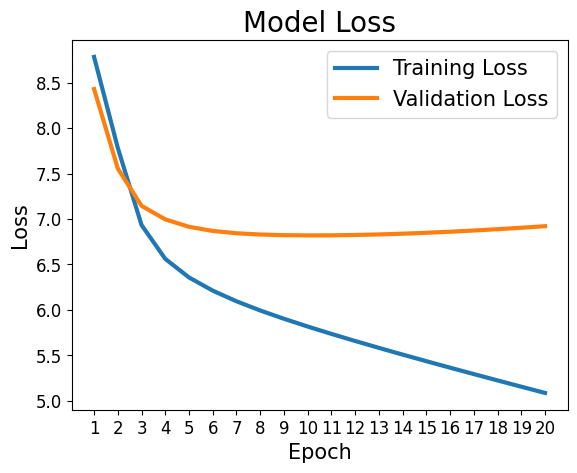

In [ ]:
# CELL #6

# inspired by my own codes in: https://github.com/rsd16/my-pytorch-tutorial/blob/6e406bc936552db58b35f022aa59fb223b7dd1f0/ptmein34.py#L238C1-L252C11

plt.plot(train_loss_progress, label="Training Loss", linewidth=3)
plt.plot(val_loss_progress, label="Validation Loss", linewidth=3)
plt.title("Model Loss", fontsize=20)
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.xticks(range(EPOCHS), range(1, EPOCHS + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best", fontsize=15)
plt.show()

#### 5.2) implement the dashed green lines in the figure. compare with 5.1 (15 extra points)

In [ ]:
# CELL #7

# Neural Probabilistic Language Model:


class NPLM_V2(nn.Module):
    def __init__(self, vocab_size, embedding_dim, input_size, h):
        super(NPLM_V2, self).__init__()

        self.input_size = input_size
        self.embedding_dim = embedding_dim

        # to convert tokens to numbers and make my life a bit easier:
        # inspired by https://stackoverflow.com/a/51060374
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)

        # we multiply input_size to embedding_dim, since, we have two words in our input:
        self.fc1 = nn.Linear(input_size * embedding_dim, h)

        self.tanh = nn.Tanh()

        self.fc2 = nn.Linear((input_size * embedding_dim) + h, vocab_size)

    def forward(self, x):
        # we concatenate of both tokens' embeddings (x_1 and x_2)
        embeddings = self.embeddings(x)

        # we convert from (batch_size, num_words, embedding_dim) to...
        # ...(batch_size, num_words * embedding_dim)
        # meaning: from (256, 2, 200) to (256, 400).
        # this makes the following linear layers process easier:
        embeddings = embeddings.view((-1, self.input_size * self.embedding_dim))

        x = self.fc1(embeddings)

        x = self.tanh(x)

        x = torch.cat([embeddings, x], dim=1)

        x = self.fc2(x)

        # inspired by my friend's suggestion and also the link: https://pytorch.org/docs/stable/generated/torch.nn.functional.log_softmax.html
        # Applies a softmax followed by a logarithm. While mathematically equivalent to log(softmax(x))
        x = F.log_softmax(x, dim=1)

        return x

In [ ]:
# CELL #8

# negative log-likelihood loss:
criterion = nn.NLLLoss()

# create our model:
model = NPLM_V2(len(unique_tokens), EMBEDDING_DIM, INPUT_SIZE, H).to(device)

optimizer = optim.Adam(model.parameters(), lr=2e-3)

In [ ]:
# CELL #9

# training time:
# inspired by my own codes in: https://github.com/rsd16/my-pytorch-tutorial/blob/6e406bc936552db58b35f022aa59fb223b7dd1f0/ptmein34.py#L134C1-L206C236

train_loss_progress = []
val_loss_progress = []

for epoch in range(EPOCHS):
    print(f"\nEpoch: {epoch + 1}")

    train_loss = 0

    model.train()

    for i, data_tensor in enumerate(train_loader):
        x = data_tensor[:, 0:2]
        y = data_tensor[:, 2]

        x = x.type(torch.LongTensor)
        y = y.type(torch.LongTensor)

        x = x.to(device)
        y = y.to(device)

        # zero out the gradients from the old instance:
        model.zero_grad()

        # get log probabilities over next words:
        log_probs = model(x)

        # compute the loss:
        loss = criterion(log_probs, y)
        train_loss += loss.item()

        # backward pass and update the gradient:
        loss.backward()
        optimizer.step()

    model.eval()

    val_loss = 0

    with torch.no_grad():
        for i, data_tensor in enumerate(val_loader):
            x = data_tensor[:, 0:2]
            y = data_tensor[:, 2]

            x = x.type(torch.LongTensor)
            y = y.type(torch.LongTensor)

            x =  x.to(device)
            y = y.to(device)

            log_probs = model(x)

            loss = criterion(log_probs, y)
            val_loss += loss.item()

    train_loss = train_loss / len(train_loader)
    val_loss = val_loss / len(val_loader)

    print(f"\nTraining Loss: {train_loss}; Validation Loss: {val_loss}")

    train_loss_progress.append(train_loss)
    val_loss_progress.append(val_loss)


Epoch: 1

Training Loss: 8.559987288254957; Validation Loss: 8.089746066502162

Epoch: 2

Training Loss: 7.055402719057524; Validation Loss: 7.422428744179862

Epoch: 3

Training Loss: 6.07662635583144; Validation Loss: 7.138273784092495

Epoch: 4

Training Loss: 5.4414071303147535; Validation Loss: 7.025621209825788

Epoch: 5

Training Loss: 4.974701065283555; Validation Loss: 6.993208680834089

Epoch: 6

Training Loss: 4.60607647895813; Validation Loss: 7.00451271874564

Epoch: 7

Training Loss: 4.307308352910555; Validation Loss: 7.040219851902553

Epoch: 8

Training Loss: 4.063324900773855; Validation Loss: 7.089317117418561

Epoch: 9

Training Loss: 3.8619378621761618; Validation Loss: 7.14611952645438

Epoch: 10

Training Loss: 3.692862345622136; Validation Loss: 7.207413673400879

Epoch: 11

Training Loss: 3.548489735676692; Validation Loss: 7.271092891693115

Epoch: 12

Training Loss: 3.4232746821183424; Validation Loss: 7.335864816393171

Epoch: 13

Training Loss: 3.313047234

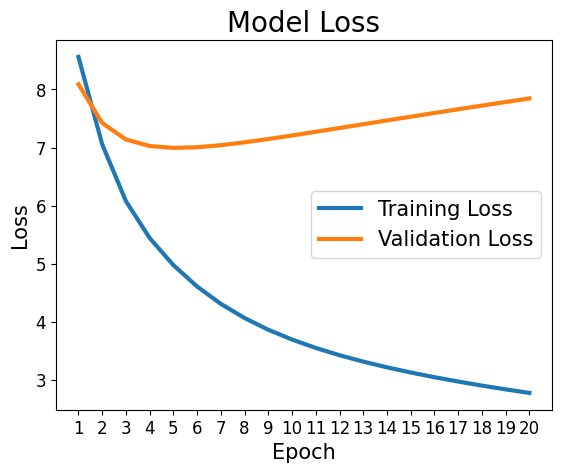

In [ ]:
# CELL #10

# inspired by my own codes in: https://github.com/rsd16/my-pytorch-tutorial/blob/6e406bc936552db58b35f022aa59fb223b7dd1f0/ptmein34.py#L238C1-L252C11

plt.plot(train_loss_progress, label="Training Loss", linewidth=3)
plt.plot(val_loss_progress, label="Validation Loss", linewidth=3)
plt.title("Model Loss", fontsize=20)
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.xticks(range(EPOCHS), range(1, EPOCHS + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best", fontsize=15)
plt.show()

## Question 6 (20 points)

Choose  one  paper from [ACL 2023 (Volume 1: Long Papers)](https://aclanthology.org/events/acl-2023/#2023acl-long) that you find interesting. A good way to do this is by scanning the titles and abstracts; there are hundreds of papers so take your time before selecting one!  Then, write a summary in  your own words of the paper you chose. Your summary should answer the following questions: what is its motivation? Why should anyone care about it? Were there things in the paper that you didn't understand at all? What were they? Fill out the below cell, and make sure to write 2-4 paragraphs for the summary to receive full credit!
`You can not copy and paste anything from the paper or even paraphrasing the paper for that matter. You should read the paper, and then write your own understanding of the paper.`

**Title of paper**: ManagerTower: Aggregating the Insights of Uni-Modal Experts for Vision-Language Representation Learning

**Authors**: Xiao Xu | Bei Li | Chenfei Wu | Shao-Yen Tseng | Anahita Bhiwandiwalla | Shachar Rosenman | Vasudev Lal | Wanxiang Che | Nan Duan
from Harbin Institute of Technology, Harbin, China; Northeastern University, Shenyang, China; Microsoft Research Asia; Intel Labs, Cognitive Computing Research

**URL**: https://arxiv.org/abs/2306.00103 || https://aclanthology.org/2023.acl-long.811/

**Your summary**:

For this question, we read the paper titled: “ManagerTower: Aggregating the Insights of Uni-Modal Experts for Vision-Language Representation Learning”. This paper is from authors with multiple affiliates such as Harbin Institute of Technology, Harbin, China; Northeastern University, Shenyang, China; Microsoft Research Asia; Intel Labs, Cognitive Computing Research.

In this paper, the authors introduce a novel approach to the problem of vision-language learning. This field aims to develop AI systems which capable of comprehending both images and text, with applications such as visual question answering (VQA). Over the years, Transformer-based models have made significant progress in this area, particularly the two-tower architecture, consisting of textual and visual encoders. However, previous models have limitations in exploiting the systematic knowledge of uni-modal representations.
The authors present ManagerTower as an improvement over previous models such as BridgeTower. ManagerTower introduces the concept of “managers” that aggregate insights from pre-trained uni-modal experts at different levels. It employs both textual and visual encoders (RoBERTa Base and CLIP ViT Base) and enhances cross-modal alignment and fusion. The paper discusses three types of managers and their design schema, which we are going to talk about them in following paragraphs.

First, the authors employ the Self-Adaptive Entity (SAE) manager, which aggregates uni-modal and cross-modal representations. Second, they implement the Self-Adaptive Uni-modal Entity (SAUE) manager, which focuses on the output representations of the previous cross-modal layer. However, both SAE and SAUE managers have limitations, including redundancy and the need for different aggregation methods for tokens.

To address these issues, the paper introduces the third and novel type of the managers, the Adaptive Aggregation Uni-modal Entity (AAUE) manager. This manager generates different aggregation methods for tokens in different samples, thus, enhancing cross-modal representation learning. By incorporating a cross-modal fused query, the AAUE manager substantially improves performance compared to other managers on various datasets.

ManagerTower exhibits better performance in downstream real tasks compared to base-size models which are pre-trained on a small dataset. The introduction of managers enhances the exploitation of different and various levels of uni-modal semantic knowledge, resulting in remarkable performance gains in VQA tasks. Visualization of the aggregation weights generated by different managers reveals the adaptability and diversity of AAUE managers. This concept highlights their effectiveness in cross-modal representation learning.

In summary, authors of this paper introduce a novel approach to vision-language learning by proposing an architecture called ManagerTower. The proposed architecture incorporates managers which adaptively aggregate insights from uni-modal experts at different and various levels. These managers offer more comprehensive cross-modal alignment and fusion, and the introduction of AAUE managers substantially improves performance. ManagerTower is compatible with various visual, textual, and cross-modal encoders, making it a valuable and suitable addition to the field of vision-language representation learning.



## AI Disclosure

*   Did you use any AI assistance to complete this homework? If so, please also specify what AI you used.
    * Yes!


---
*(only complete the below questions if you answered yes above)*

*   If you used a large language model to assist you, please paste *all* of the prompts that you used below. Add a separate bullet for each prompt, and specify which problem is associated with which prompt.
    * Question 1.1: "in latex, how to get n=1 under Product character (\prod)"
    * Questions 1.2, 1.3, 2.2, 3.1: "fix any grammar issues with the following text, and then, shorten it just a little bit:"
    * ًQuestion 2.2: "name some reasons for not using stopwords"
    * Question 4.3: we have a list of most common tokens. we want to form a matrix for visualizing a heatmap of this occurrence. please write a python code for this.
    * Question 4.5: i have a list of values. how to choose randomly with the help of torch.mutinomial?
    * Question 4.5: i have a list of bigrams. please make a square matrix in the size of: (vocab_size, vocab_size) and increment each cell of the said matrix, if there is an occurrence in my initial list of bigrams. use pytorch.
    * Question 4.5: compute average negative log likelihood of all bigrams using pytorch.
    * Question 4.5: explain components of average negative log likelihood.
    * Question 4.5: suppose you have a list of bigrams that you want to compute average negative log likelihood for them. your matrix of bigrams is squared and to the size of (vocab_size, vocab_size). please by using pytorch, compute this measure.
    * Question 4.5: what does bigram statistics mean in question below? does it mean that we cannot use bigrams itself, or we cannot use bigrams occurrences and probabilities?
    * Question 6: fix "any grammar issues with the following text, and then, paraphrase it" + "what does the following paragraph mean? "a small excerpt from the paper""
    
*   **Free response**: For each problem for which you used assistance, describe your overall experience with the AI. How helpful was it? Did it just directly give you a good answer, or did you have to edit it? Was its output ever obviously wrong or irrelevant? Did you use it to get the answer or check your own answer?
    * *your response here*

